In [1]:
from spacerocks.spacerock import SpaceRock, RockCollection
from spacerocks.observing import Observatory, DetectionCatalog
from spacerocks.spice import SpiceKernel
from spacerocks.time import Time

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")

In [2]:
o = Observatory.from_coordinates(np.radians(-30.00293494202556), np.radians(-70.80642), 2207.0)

In [3]:
deedee = SpaceRock.from_horizons("2014 UZ224")
arrokoth = SpaceRock.from_horizons("2014 MU69")

epoch = Time.now()

deedee.analytic_propagate(epoch)
arrokoth.analytic_propagate(epoch)

observer = o.at(epoch)

obs_deedee = deedee.observe(observer)
obs_arrokoth = arrokoth.observe(observer)

In [4]:
obs_deedee.dec_rate

9.920938613203603e-05

In [5]:
obs_deedee.calc_altaz()

(0.9272248184211315, 4.243221688445368)

In [6]:
rocks = RockCollection()

rocks.add(deedee)
rocks.add(arrokoth)

In [26]:
rocks.analytic_propagate(Time.now())
#rocks.inc

In [27]:
deedee.name

'2014 UZ224'

In [13]:
N = 100_000
rocks = RockCollection.random(N)

In [14]:
epoch = Time.now()
observer = o.at(epoch)

In [15]:
%%time
catalog = rocks.observe(observer)

CPU times: user 3.53 s, sys: 288 ms, total: 3.82 s
Wall time: 3.79 s


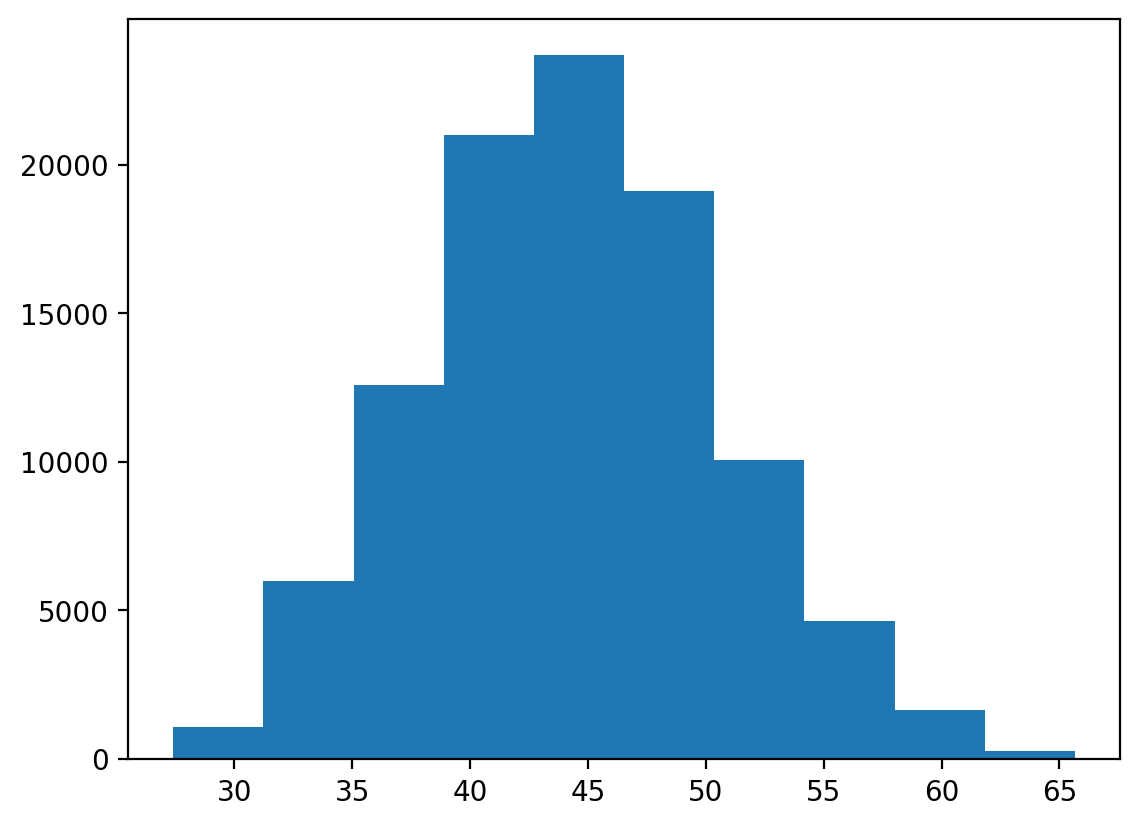

In [21]:
_ = plt.hist(catalog.rho)

In [23]:
alt, az = catalog.calc_altaz()
alt = np.degrees(alt)

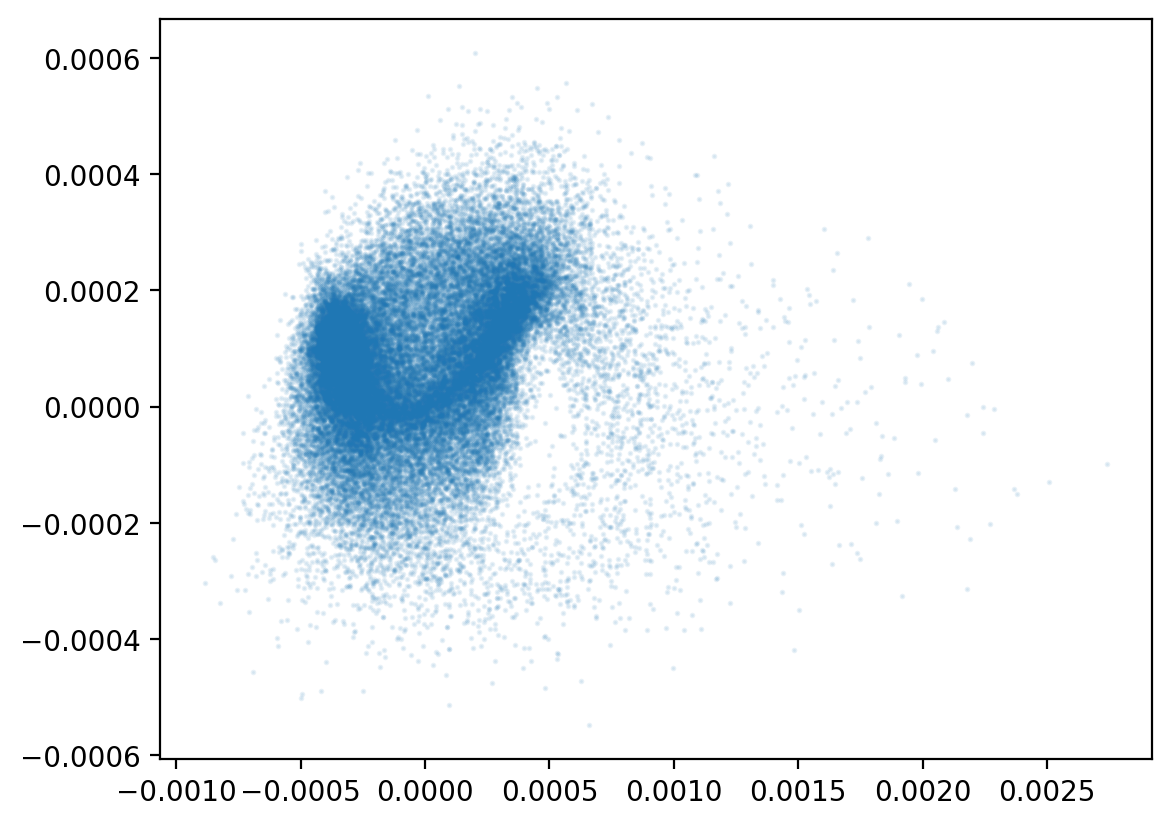

In [25]:
plt.scatter(catalog.ra_rate[alt > np.radians(23)], catalog.dec_rate[alt > np.radians(23)], s=1, alpha=0.1)

In [17]:
alt, az = catalog.calc_altaz()
alt = np.degrees(alt)

In [18]:
up = alt > 0

(-90.0, 90.0)

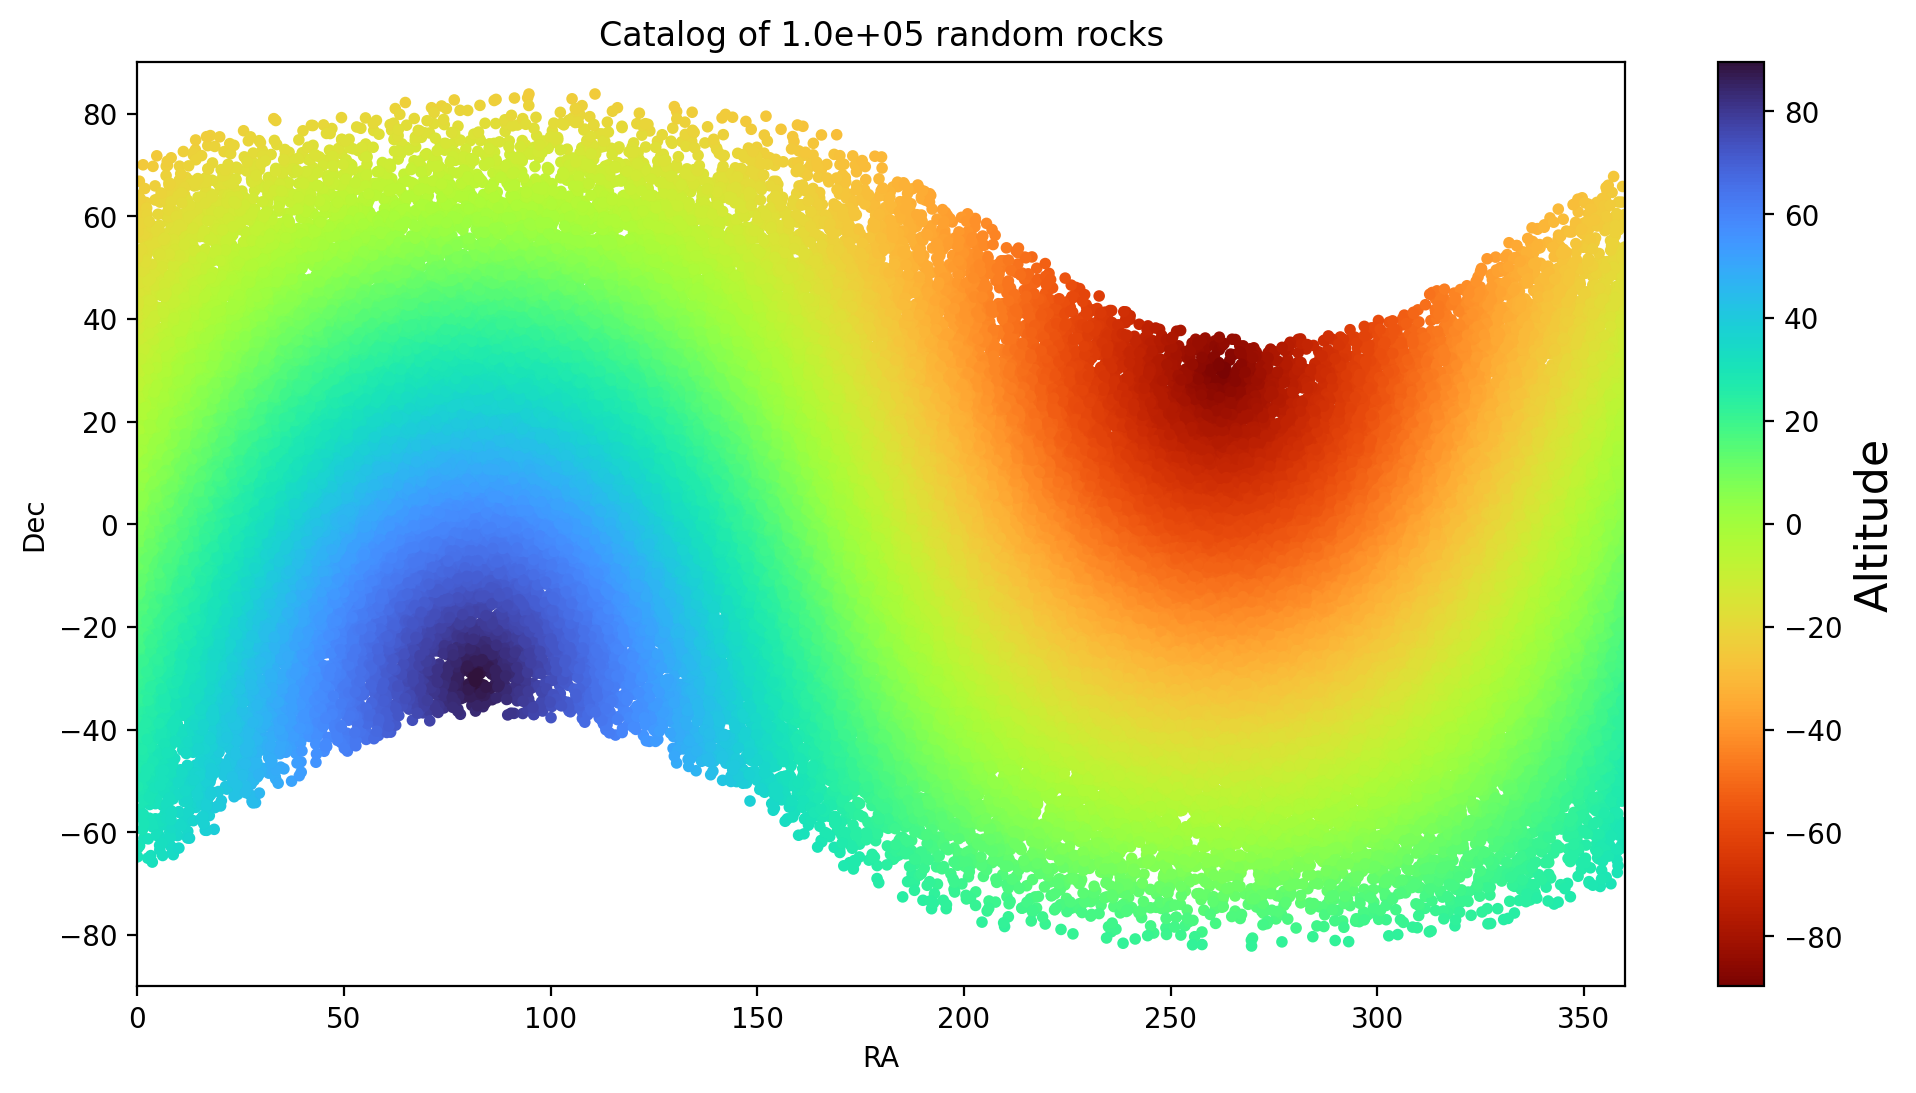

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
#ax.scatter(np.degrees(catalog.ra)[up], np.degrees(catalog.dec)[up], s=1, alpha=0.01, color='chartreuse')
#ax.scatter(np.degrees(catalog.ra)[~up], np.degrees(catalog.dec)[~up], s=1, alpha=0.01, color='crimson')

sc = ax.scatter(np.degrees(catalog.ra), np.degrees(catalog.dec), s=10, alpha=1, c=alt, cmap='turbo_r')
cbar = fig.colorbar(sc, label="Altitude")
cbar.set_label("Altitude", fontsize=16)
# change the transparency of the colorbar
cbar.solids.set(alpha=1)


ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title(f"Catalog of {N:.1e} random rocks")
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)

In [16]:
rocks.change_frame("ECLIPJ2000")

In [20]:
%%time
rocks.analytic_propagate(Time.now())

CPU times: user 1.24 s, sys: 188 ms, total: 1.43 s
Wall time: 197 ms


In [19]:
%%time
rocks.calculate_orbit()

CPU times: user 131 ms, sys: 2.25 ms, total: 133 ms
Wall time: 17.8 ms


In [48]:
rocks.x

array([-116.84001636,    4.95433572,  -55.60241395, ...,  -70.45369713,
        -11.41080755,   23.23535953])